In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import *
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         20.400047        84.142085        11.164095        80.617666   
1         30.428877        46.200481        23.681515        91.296005   
2          4.177276        79.221188        37.603764        64.542208   
3         62.868586        92.788554        76.666606        85.549826   
4         14.527965        43.358317        10.505038        94.679356   
5         13.595145        74.714755        62.413543        78.662126   
6         49.622950        59.044282        16.647016        22.506216   
7         16.397697        71.054646        49.846103        95.996066   
8         17.963989        36.472354        12.869352        13.318116   
9         62.470209        76.313667        44.700686        58.613976   
10        48.730717        94.934755        64.995920        75.544

In [2]:
model = IntervalAgglomerativelustering(n_clusters=3, linkage='complete')

model.fit(random_data.get_intervals(),metric='euclidean',aggregate='mean')

print(model.get_labels())

[0 2 2 1 2 1 2 1 2 2 1 2 1 1 0 0 1 1 0 2 2 2 0 0 1 1 1 2 1 0]


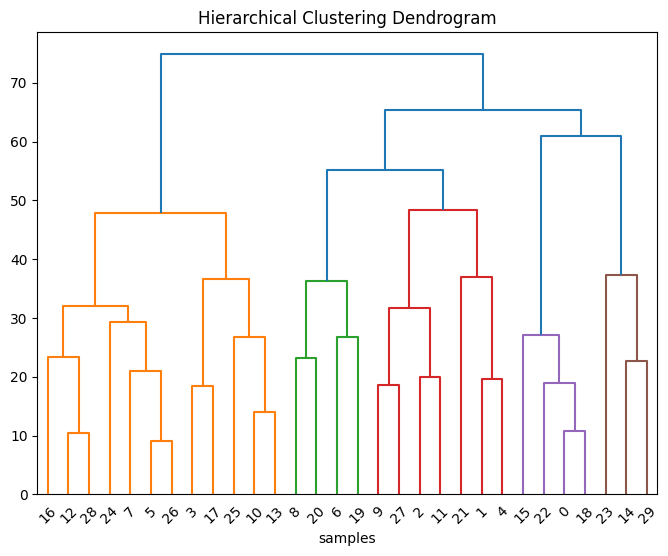

In [3]:
plt.figure(figsize=(8, 6))
ClusteringVisualization.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [16]:
model = IntervalFuzzyCMeans(n_clusters=3, max_iter=100,adaptive_weights=True)

model.fit(random_data.get_intervals(),metric='hausdorff')

model.get_membership()

array([[0.82745715, 0.10531501, 0.06722785],
       [0.1943207 , 0.29922786, 0.50645143],
       [0.22214549, 0.1762099 , 0.60164461],
       [0.14441418, 0.5714637 , 0.28412212],
       [0.48389429, 0.31538336, 0.20072236],
       [0.1159701 , 0.68976932, 0.19426058],
       [0.21379329, 0.12222754, 0.66397917],
       [0.17271562, 0.70972851, 0.11755586],
       [0.65054108, 0.14732226, 0.20213667],
       [0.08358732, 0.12328706, 0.79312562],
       [0.22206381, 0.67089154, 0.10704464],
       [0.2247015 , 0.08349684, 0.69180166],
       [0.05230877, 0.90606899, 0.04162224],
       [0.0759267 , 0.87695742, 0.04711588],
       [0.45056166, 0.20058364, 0.3488547 ],
       [0.55613415, 0.28143366, 0.16243218],
       [0.15557913, 0.57940449, 0.26501638],
       [0.12915671, 0.42989987, 0.44094342],
       [0.85638145, 0.08092093, 0.06269762],
       [0.550603  , 0.14889002, 0.30050698],
       [0.71109803, 0.13726685, 0.15163512],
       [0.2647604 , 0.15857652, 0.57666308],
       [0.

In [17]:
model.get_hard_assignments()

array([0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 2, 1, 1, 1, 2, 1, 2])